# Building a simple linear regression model

- Build regression model that will use following datapoints to train model using gradient descent optimization

## Country, income, mortality
- Hungary,200,65.7
- Japan,239,46.7
- France,472,44.4
- Australia,885,22.9
- Switzerland,1045,28.5
- Finland,688,32.4
- Canada,993,33.7

### Complete 50 learning epochs using above datapoints

## Use following datapoints to measure model's prediction error as MSE. 
### Model predictions should be compared w.r.t. measured infant mortality values:
- Greece,134,47.4
- Austria,556,49.1
- Italy,295,55.7
- Denmark,906,27.1

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

X = [200,239,472,885,1045,688,993]
Y = [65.7,46.7,44.4,22.9,28.5,32.4,33.7]

X_max = np.max(X)
Y_max = np.max(Y)

# normalize data
X = np.true_divide(X, X_max)
Y = np.true_divide(Y, Y_max)
plt.xlim(0, max(X))
plt.ylim(0, max(Y))

[1045, 688, 993]
[28.5, 32.4, 33.7]


(0, 1.0)

 b0: -0.0556543154744 b1: 0.213870339961 b2: 0.343286931761 Error: 6.95466964205
 b0: 0.327482375866 b1: 0.320530743256 b2: 0.380279842539 Error: 0.62937367133
 b0: 0.332098838296 b1: 0.213036296219 b2: 0.258601958275 Error: 0.447307671849
 b0: 0.419481037469 b1: 0.169735301743 b2: 0.191590476906 Error: 0.283980429809
 b0: 0.474672614371 b1: 0.118979787234 b2: 0.123456175153 Error: 0.229437449177
 b0: 0.528172997448 b1: 0.0777606093095 b2: 0.0666792932529 Error: 0.177091642751
 b0: 0.573528235857 b1: 0.0408050814535 b2: 0.0166897594924 Error: 0.140334823763
 b0: 0.613465235023 b1: 0.00859338382398 b2: -0.0265915487329 Error: 0.112066154863
 b0: 0.648250115643 b1: -0.0197395933941 b2: -0.0642212720861 Error: 0.0909372978702
 b0: 0.678648960424 b1: -0.0446238498817 b2: -0.0968713668023 Error: 0.0750474897423
 b0: 0.705194976717 b1: -0.0665164822854 b2: -0.12519103307 Error: 0.0631502869388
 b0: 0.728387356638 b1: -0.0857954367657 b2: -0.149730558412 Error: 0.054257969943
 b0: 0.748652876

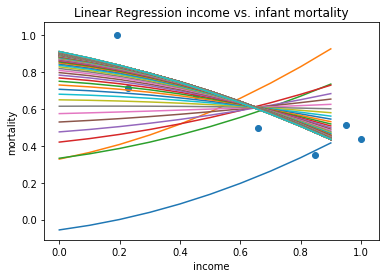

In [17]:
def calc_total_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 3

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b2 = 1.0
b1 = 1.0
b0 = 1.0

learn = 0.5

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(X, Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(X), 5)
sample_X = [X[i] for i in sorted(batchSample)]
sample_Y = [Y[i] for i in sorted(batchSample)]

for i in range(100):
    ERROR = mse(X, Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b2_temp_error = mse(sample_X, sample_Y, calc_b2_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    b2 = adjustWeight(b2, learn, b2_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b2*X_test**2+ b1*X_test + b0)
    plt.pause(0.1)

plt.show()

# Review Questions
1. What are the model’s parameter values and measured MSE for the test datapoints at the
end of the optimization process when the starting parameter values are b0 = 1 and b1 = 1:

2. Repeat the above optimization, but set the starting parameter values to b0 = -1 and b1
= -1. Again, report the final parameter values and the model’s MSE:

3. Is there a discrepancy in the reported MSE values in (1) and (2)? Why/Why Not.